In [1]:
import pandas as pd

data = pd.read_csv("/content/Mall_Customers.csv")

df = pd.DataFrame(data)

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# cleaning
df.dropna()
df.drop_duplicates(inplace=True)

In [3]:
# convert into machine readable values

df = pd.get_dummies(df, drop_first = True)

print(df.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

# print(df_scaled)


[[-1.7234121  -1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.70609137 -1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.68877065 -1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.67144992 -1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-1.6541292  -0.56336851 -1.66266033 -0.39597992 -0.88640526]
 [-1.63680847 -1.20926872 -1.66266033  1.00159627 -0.88640526]
 [-1.61948775 -0.27630176 -1.62449091 -1.71591298 -0.88640526]
 [-1.60216702 -1.13750203 -1.62449091  1.70038436 -0.88640526]
 [-1.5848463   1.80493225 -1.58632148 -1.83237767  1.12815215]
 [-1.56752558 -0.6351352  -1.58632148  0.84631002 -0.88640526]
 [-1.55020485  2.02023231 -1.58632148 -1.4053405   1.12815215]
 [-1.53288413 -0.27630176 -1.58632148  1.89449216 -0.88640526]
 [-1.5155634   1.37433211 -1.54815205 -1.36651894 -0.88640526]
 [-1.49824268 -1.06573534 -1.54815205  1.04041783 -0.88640526]
 [-1.48092195 -0.13276838 -1.54815205 -1.44416206  1.12815215]
 [-1.46360123 -1.20926872 -1.54815205  1.11806095  1.12

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

df_pca = pca.fit_transform(df_scaled)

# print(df_pca)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 42)

kmeans.fit(df_pca)

KMeans(n_clusters=5, random_state=42)

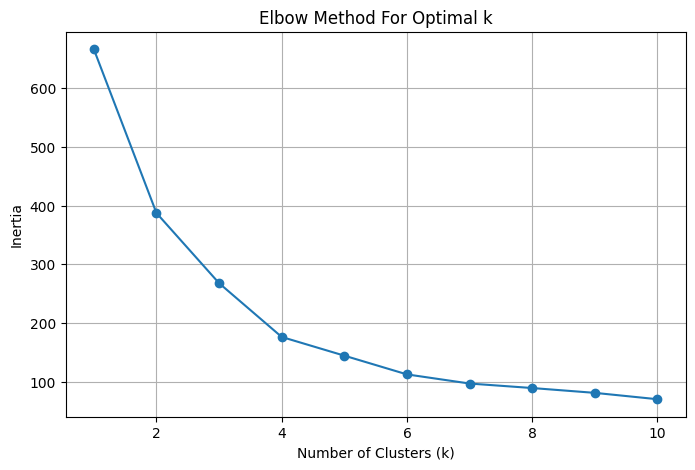

Silhouette Score: 0.4244


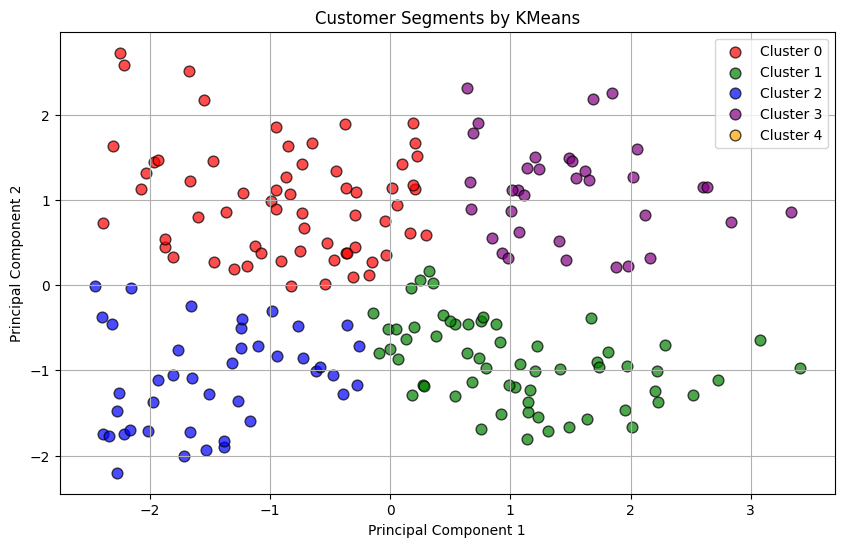

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         64.873016  53.460317           45.984127               40.095238   
1        144.750000  30.983333           78.916667               69.800000   
2         37.452381  25.809524           33.142857               64.785714   
3        164.428571  41.685714           88.228571               17.285714   

         Gender_Male  
Cluster               
0           0.460317  
1           0.400000  
2           0.357143  
3           0.571429  


In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.show()

# 8. Final KMeans Clustering (assume 5 clusters from elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

# 9. Silhouette Score
score = silhouette_score(df_pca, cluster_labels)
print(f"Silhouette Score: {score:.4f}")

# 10. Visualize Clusters
plt.figure(figsize=(10, 6))
colors = ["red", "green", "blue", "purple", "orange"]
for i in range(5):
    plt.scatter(
        df_pca[cluster_labels == i, 0],
        df_pca[cluster_labels == i, 1],
        label=f"Cluster {i}",
        s=60,
        color=colors[i],
        alpha=0.7,
        edgecolors='k'
    )

plt.title("Customer Segments by KMeans")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 11. Attach clusters back to original data
df["Cluster"] = cluster_labels
print(df.groupby("Cluster").mean())

In [12]:
print(df.tail())

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
195         196   35                 120                      79        False   
196         197   45                 126                      28        False   
197         198   32                 126                      74         True   
198         199   32                 137                      18         True   
199         200   30                 137                      83         True   

     Cluster  
195        1  
196        3  
197        1  
198        3  
199        1  
